Step 1: Data Understanding and Preparation


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler


In [62]:
# Load the dataset

df = pd.read_csv('dataset.csv')


In [63]:
# Display the first few rows of the dataset

print(df.head())


  Opportunity ID           Technology\nPrimary       City    B2B Sales Medium  \
0      N00000001            ERP Implementation  Bengaluru           Marketing   
1      N00000002            ERP Implementation      Delhi  Enterprise Sellers   
2      N00000003  Technical Business Solutions      Delhi  Enterprise Sellers   
3      N00000004  Technical Business Solutions     Mumbai  Enterprise Sellers   
4      N00000005            ERP Implementation      Delhi  Enterprise Sellers   

   Sales Velocity Opportunity Status  Sales Stage Iterations  \
0              76                Won                      13   
1              63               Loss                       2   
2              24                Won                       7   
3              16               Loss                       5   
4              69               Loss                      11   

   Opportunity Size (USD) Client Revenue Sizing Client Employee Sizing  \
0                       0          More than 1M       

In [64]:
# Check for missing values

print(df.isnull().sum())


Opportunity ID                       0
Technology\nPrimary                  0
City                                 0
B2B Sales Medium                     0
Sales Velocity                       0
Opportunity Status                   0
Sales Stage Iterations               0
Opportunity Size (USD)               0
Client Revenue Sizing                0
Client Employee Sizing               0
Business from Client Last Year       0
Compete Intel                     9257
Opportunity Sizing                   0
dtype: int64


In [65]:
# Check for duplicate rows

print(df.duplicated().sum())


0


Step 2: Exploratory Data Analysis (EDA)


In [66]:
# Check the data types of each column

print(df.dtypes)


Opportunity ID                    object
Technology\nPrimary               object
City                              object
B2B Sales Medium                  object
Sales Velocity                     int64
Opportunity Status                object
Sales Stage Iterations             int64
Opportunity Size (USD)             int64
Client Revenue Sizing             object
Client Employee Sizing            object
Business from Client Last Year    object
Compete Intel                     object
Opportunity Sizing                object
dtype: object


Step 2: Exploratory Data Analysis (EDA)


       Sales Velocity  Sales Stage Iterations  Opportunity Size (USD)
count    78025.000000            78025.000000            78025.000000
mean        43.595348                2.955732            30085.664992
std         26.585600                1.497242            21169.932617
min          0.000000                1.000000                0.000000
25%         19.000000                2.000000            13816.000000
50%         43.000000                3.000000            29845.000000
75%         65.000000                3.000000            43185.000000
max        210.000000               23.000000           149981.000000


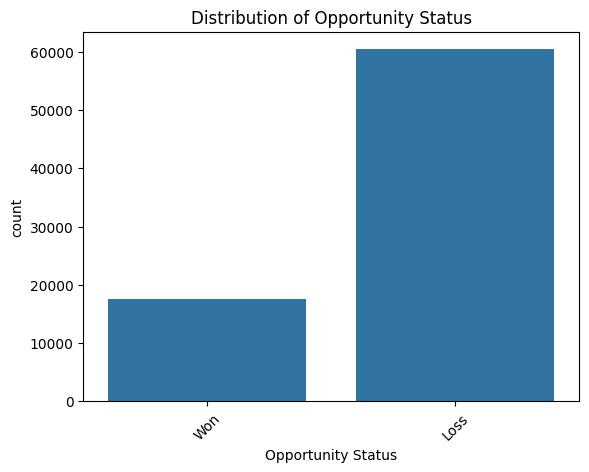

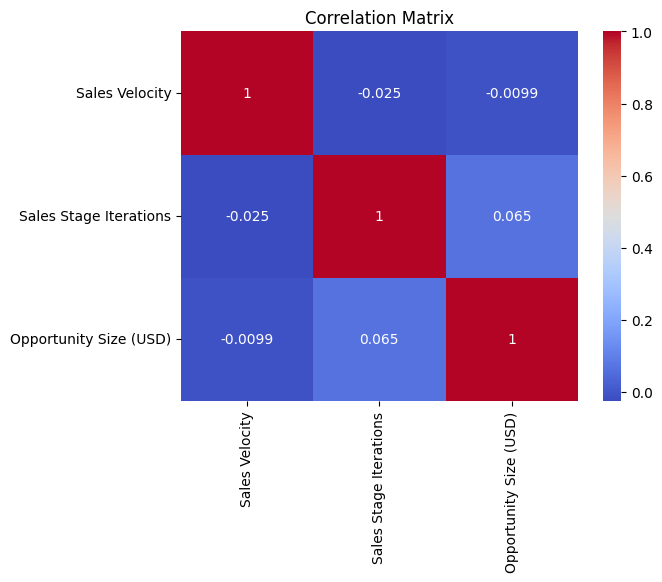

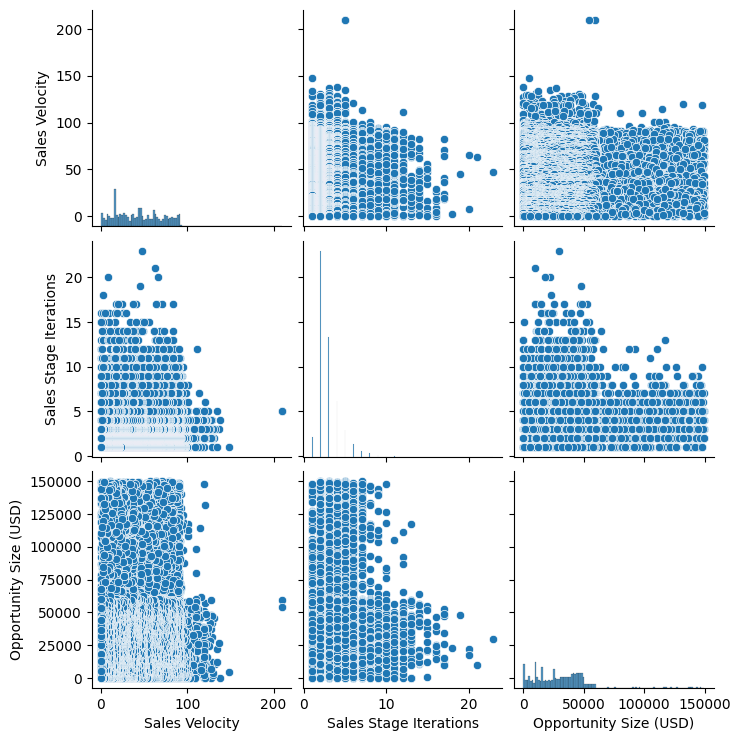

In [67]:
# Summary statistics
print(df.describe())

# Distribution of the target variable 'Opportunity Status'
sns.countplot(x='Opportunity Status', data=df)
plt.title('Distribution of Opportunity Status')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

# Compute correlation only for numerical columns
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Correlation matrix (only numeric columns)
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()

# Pairplot for numerical variables
sns.pairplot(numeric_df)
plt.show()



Step 3: Data Preprocessing




In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Check if 'Opportunity Status' exists in the DataFrame
if 'Opportunity Status' in df.columns:
    # Map 'Opportunity Status' to binary values
    df['Opportunity Status'] = df['Opportunity Status'].map({'Won': 1, 'Loss': 0})

    # Define features and target variable
    X = df.drop('Opportunity Status', axis=1)  # Drop target variable
    y = df['Opportunity Status']  # Set target variable
else:
    print("Error: 'Opportunity Status' column does not exist in the DataFrame.")
    # Optionally, set X and y to None or raise an exception
    X = None
    y = None


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Step 4: Model Building

In [69]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]



Step 5: Model Evaluation


Accuracy: 0.77
Confusion Matrix:
[[18027    62]
 [ 5290    29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     18089
           1       0.32      0.01      0.01      5319

    accuracy                           0.77     23408
   macro avg       0.55      0.50      0.44     23408
weighted avg       0.67      0.77      0.68     23408

ROC AUC Score: 0.65


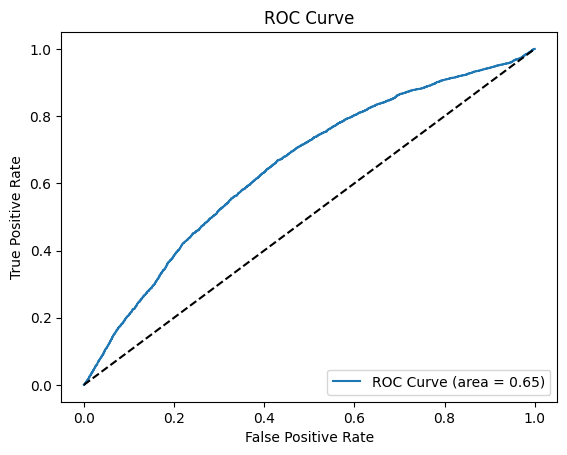

In [70]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Step 6: Assigning Lead Scores


In [72]:
# Ensure y_pred_proba has the correct length matching the number of rows in df
if len(y_pred_proba) == len(df):
    # Multiply by 100 and convert to integer for Lead Score
    lead_scores = (y_pred_proba * 100).astype(int)
    df['Lead Score'] = lead_scores

    # Print the Opportunity ID and Lead Score columns
    print(df[['Opportunity ID', 'Lead Score']].head())
else:
    print(f"Error: The length of y_pred_proba ({len(y_pred_proba)}) does not match the length of df ({len(df)})")


Error: The length of y_pred_proba (23408) does not match the length of df (78025)
